# Insurance Claim Fraud Detection

Project Description


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df_ins = pd.read_csv(r"C:\Users\Premium\Downloads\Automobile_insurance_fraud.csv")

In [3]:
df_ins.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                       ?              78650        21450   
7       603195  ...                     YES              51590         9380   
8       601734  ...                     YES              27700         2770   
9       600983  ...                       ?              42300         4700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   
7           9380         32830       Audi          A5      2015   
8           2770         22160     Toyota       Camry      2012   
9           4700         32900       Saab         92x      1996   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  
7              N  NaN  
8              N  NaN  
9              N  NaN  

[10 rows x 40 columns]

In [7]:

print("The shape of data frame:", df_ins.shape)


The shape of data frame: (1000, 40)


In [8]:
print("Column labels in the dataset in column order:",df_ins.columns)

Column labels in the dataset in column order: Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


# Statistical Analysis

In [4]:
df_ins.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

 check if any whitespace, 'NA' or '-' exist in dataset.

In [9]:
df_ins.isin([' ','NA','-']).sum().any()

False

In [10]:
df_ins.duplicated('policy_number').sum() # This will check if any duplicate entry or duplicate row with same policy_number

0

In [11]:
df_ins.isin(['?']).sum().any() ## to check wheter question mark ? present in the dataset

True

In [12]:
# Check null values
df_ins.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#_c39  has all the values missinmg so we can drop this column.

In [15]:

df_ins.drop('_c39',axis=1,inplace=True)



# Check for missing values using heatmap

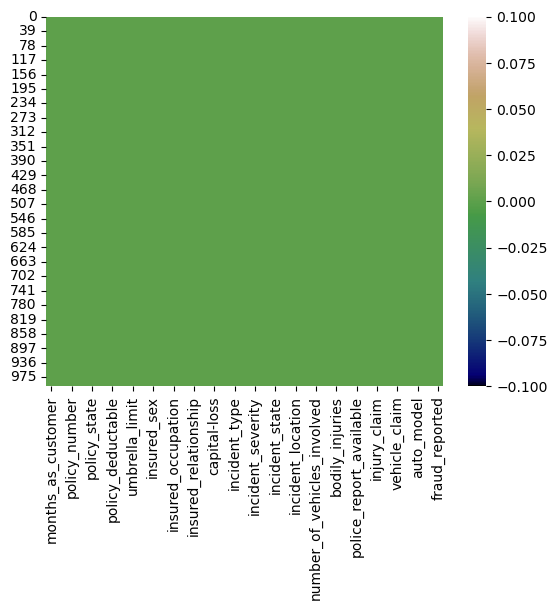

In [16]:
# Heatmap of missing value
sns.heatmap(df_ins.isnull(),cmap="gist_earth")
plt.show()

No Missing Value are Present.

We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.

In [17]:
# Converting Date columns from object type into datetime data type

df_ins['policy_bind_date']=pd.to_datetime(df_ins['policy_bind_date'])
df_ins['incident_date']=pd.to_datetime(df_ins['incident_date'])

In [18]:
# Extracting Day, Month and Year column from policy_bind_date
df_ins['policy_bind_day'] = df_ins['policy_bind_date'].dt.day
df_ins['policy_bind_month'] = df_ins['policy_bind_date'].dt.month
df_ins['policy_bind_year'] = df_ins['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df_ins['incident_day'] = df_ins['incident_date'].dt.day
df_ins['incident_month'] = df_ins['incident_date'].dt.month
df_ins['incident_year'] = df_ins['incident_date'].dt.year

In [19]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df_ins.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
df_ins.head(5)

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ...  auto_make auto_model auto_year fraud_reported  \
0        MALE  ...       Saab        92x      2004              Y   
1        MALE  ...   Mercedes       E400      2007              Y   
2      FEMALE  ...      Dodge        RAM      2007              N   
3      FEMALE  ...  Chevrolet      Tahoe      2014              Y   
4        MALE  ...     Accura        RSX      2009              N   

   policy_bind_day  policy_bind_month policy_bind_year incident_day  \
0               17                 10             2014           25   
1               27                  6             2006           21   
2                9                  6             2000           22   
3               25                  5             1990            1   
4                6                  6             2014           17   

  incident_month incident_year  
0              1          2015  
1              1          2015  
2              2          2015  
3             10          2015  
4              2          2015  

[5 rows x 43 columns]

In [21]:
# Incident year for all data is 2015 so we gone drop it.

df_ins.drop(['incident_year'],axis=1,inplace=True)

We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

As incident year is 2015, we will use 2015 as base year for new column creation.

In [22]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df_ins['Automobile_Age']=2015 - df_ins['auto_year']
# Droping auto year column
df_ins.drop("auto_year",axis=1,inplace=True)

# Spliting feature in categorical and numerical variable

In [23]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [24]:
df_ins.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  total_claim_amount  \
count    1000.000000               1000.000000  ...          1000.00000   
mean   -26793.700000                 11.644000  ...         52761.94000   
std     28104.096686                  6.951373  ...         26401.53319   
min   -111100.000000                  0.000000  ...           100.00000   
25%    -51500.000000                  6.000000  ...         41812.50000   
50%    -23250.000000                 12.000000  ...         58055.00000   
75%         0.000000                 17.000000  ...         70592.50000   
max         0.000000                 23.000000  ...        114920.00000   

       injury_claim  property_claim  vehicle_claim  policy_bind_day  \
count   1000.000000     1000.000000    1000.000000      1000.000000   
mean    7433.420000     7399.570000   37928.950000        15.448000   
std     4880.951853     4824.726179   18886.252893         8.850176   
min        0.000000        0.000000      70.000000         1.000000   
25%     4295.000000     4445.000000   30292.500000         8.000000   
50%     6775.000000     6750.000000   42100.000000        16.000000   
75%    11305.000000    10885.000000   50822.500000        23.000000   
max    21450.000000    23670.000000   79560.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       Automobile_Age  
count     1000.000000  
mean         9.897000  
std          6.015861  
min          0.000000  
25%          5.000000  
50%         10.000000  
75%         15.000000  
max         20.000000  

[8 rows x 23 columns]

# Exploratory Data Analysis

Start exploring Target variable

In [25]:
df_ins['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

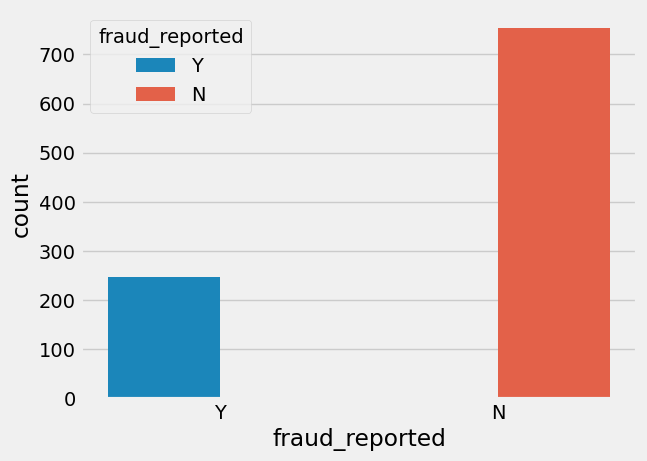

In [26]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df_ins, hue='fraud_reported')

fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

In [27]:
df_ins['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

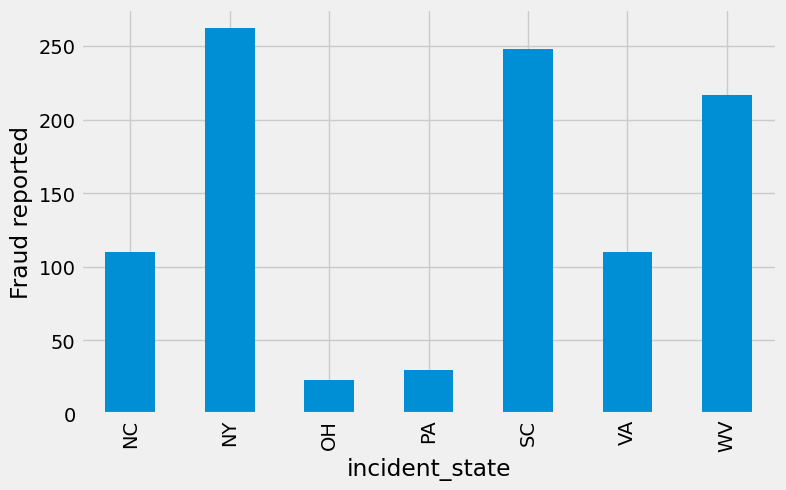

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_ins.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Analysing Age vs Fraud reported.
-------------------------------------------

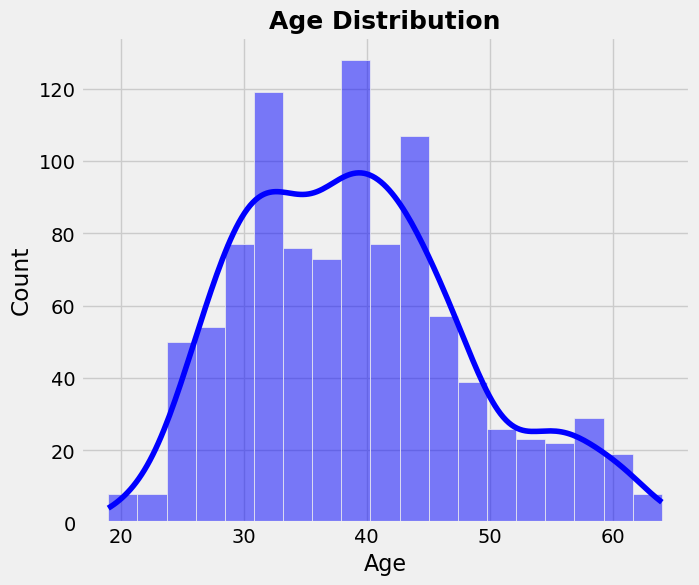

In [30]:
plt.figure(figsize=(7,6))
sns.histplot(df_ins.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [31]:
print('Minimum Age :',df_ins.age.min(),'Years')
print('Maximum Age :',df_ins.age.max(),'Years')
print('Average Age :',df_ins.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


the maximum fraud happens in the range  between age 30 to 45 yrs.

Policy state vs Fraud reported
---------------------------------------------

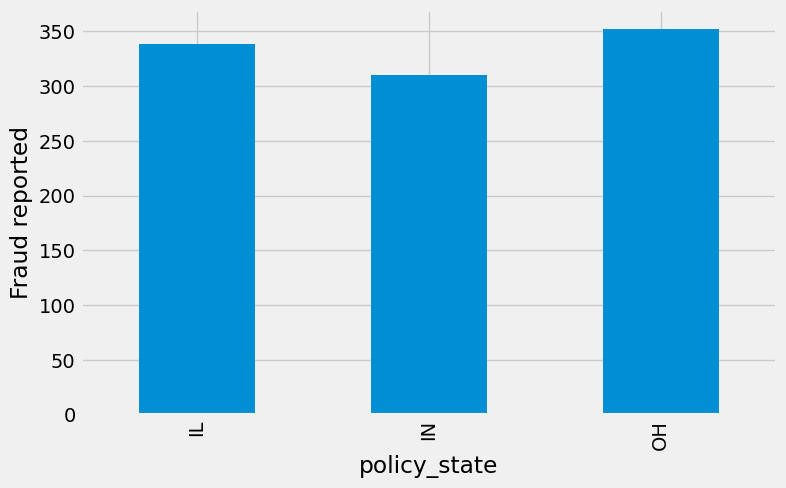

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_ins.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Maximum fraud cases come from state of Ohio.

Insured Gender VS Fraud cases
--------------------------------------------

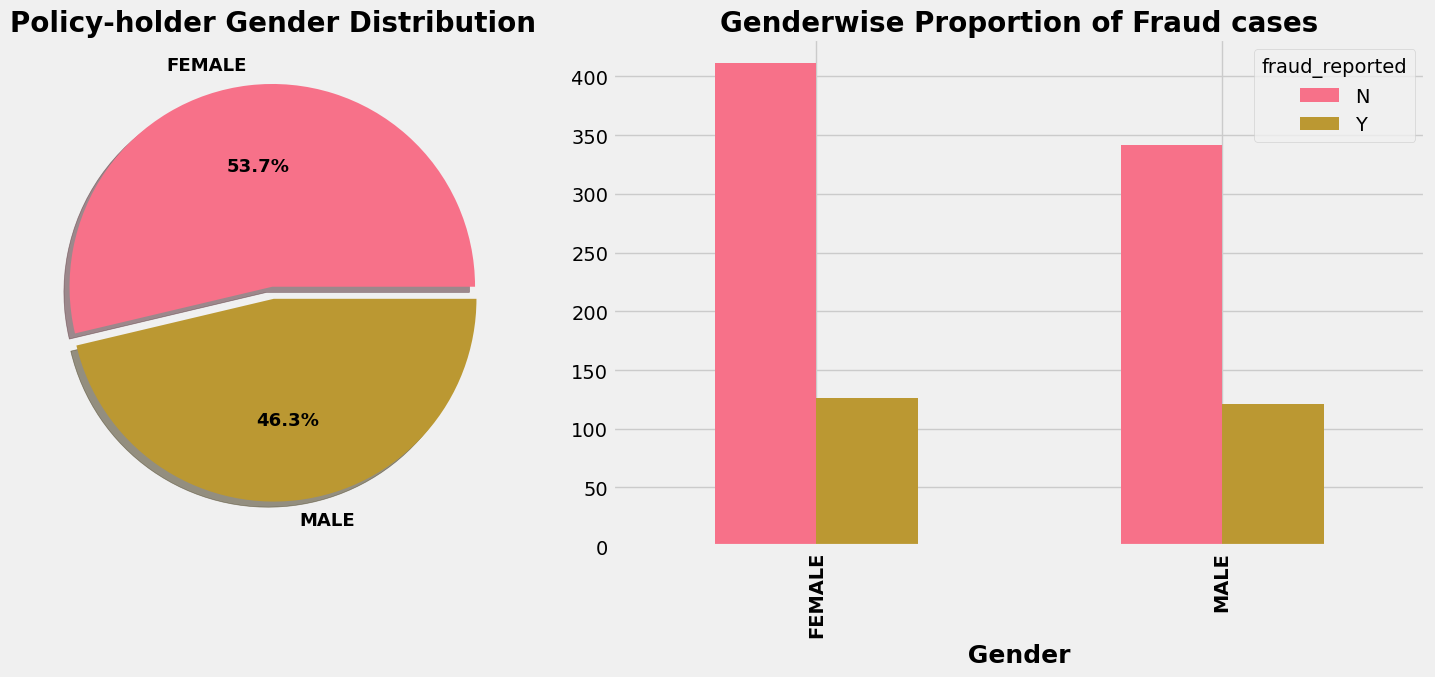

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df_ins['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')

ax[0].set_ylabel('')

table = pd.crosstab(df_ins['insured_sex'], df_ins['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


Number of claims come from female is higher than which reported by male insured.


Occupation of Insured Customers
--------------------------

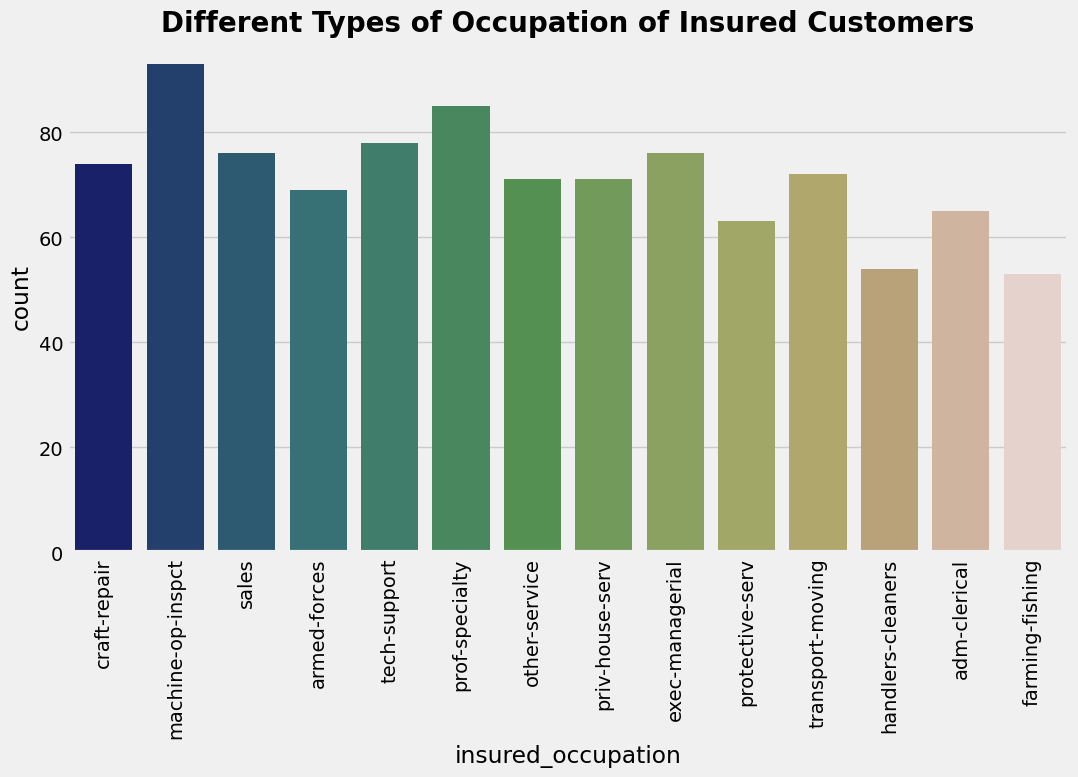

In [46]:
# let's check the insured occupation

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df_ins['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

Different Types of Incidents Vs Fraud cases
-----------------------------------------

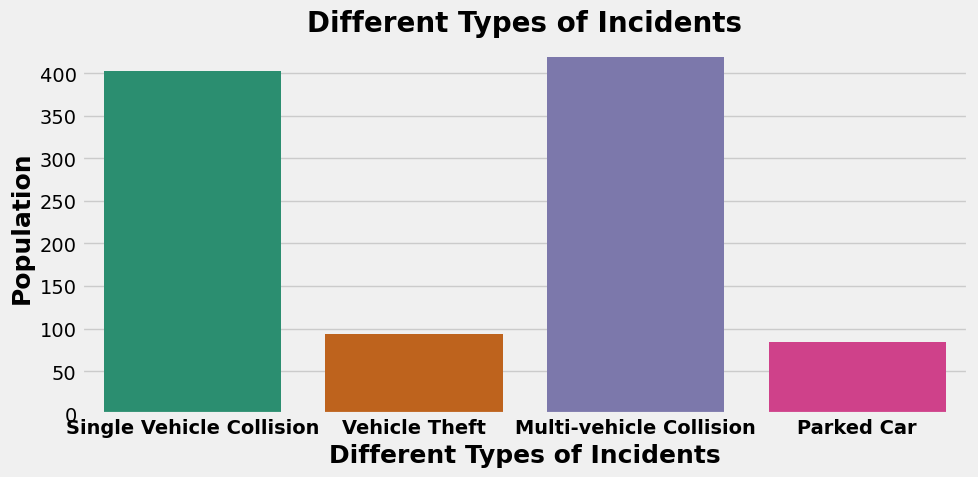

In [49]:
# let's check the incident types

plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df_ins['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Inccident Severity 
-----------------

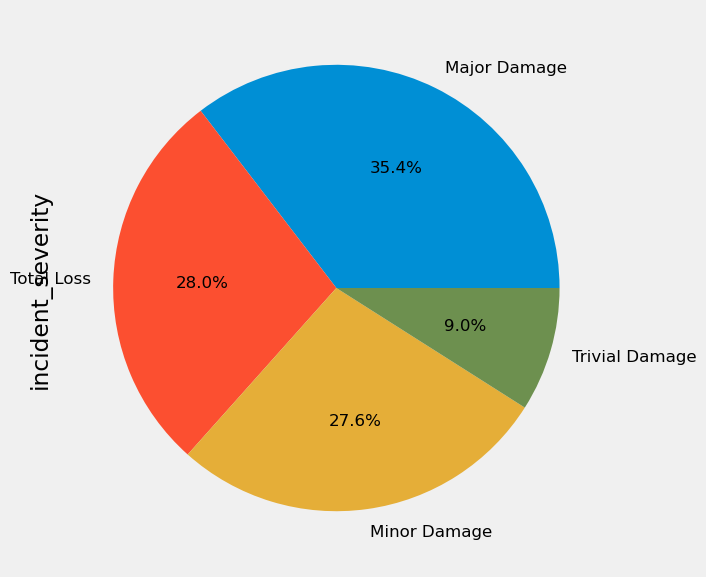

In [50]:
fig = plt.figure(figsize=(10,6))
ax = (df_ins['incident_severity'].value_counts()*100.0 /len(df_ins))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

In [51]:
df_ins["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

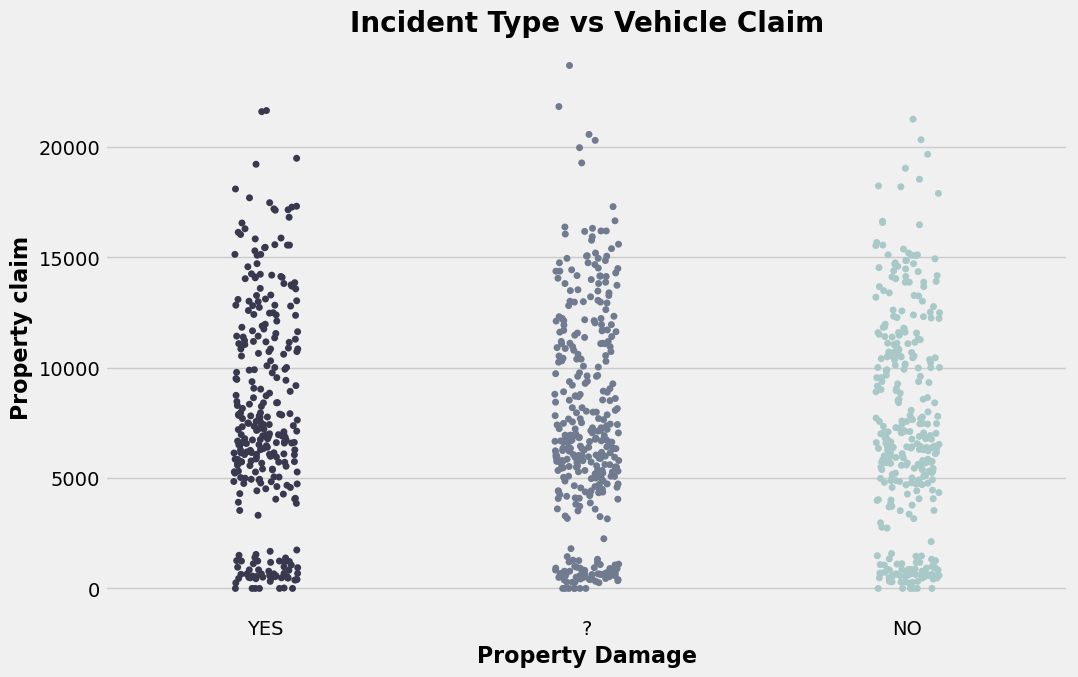

In [52]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df_ins['property_damage'], df_ins['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()


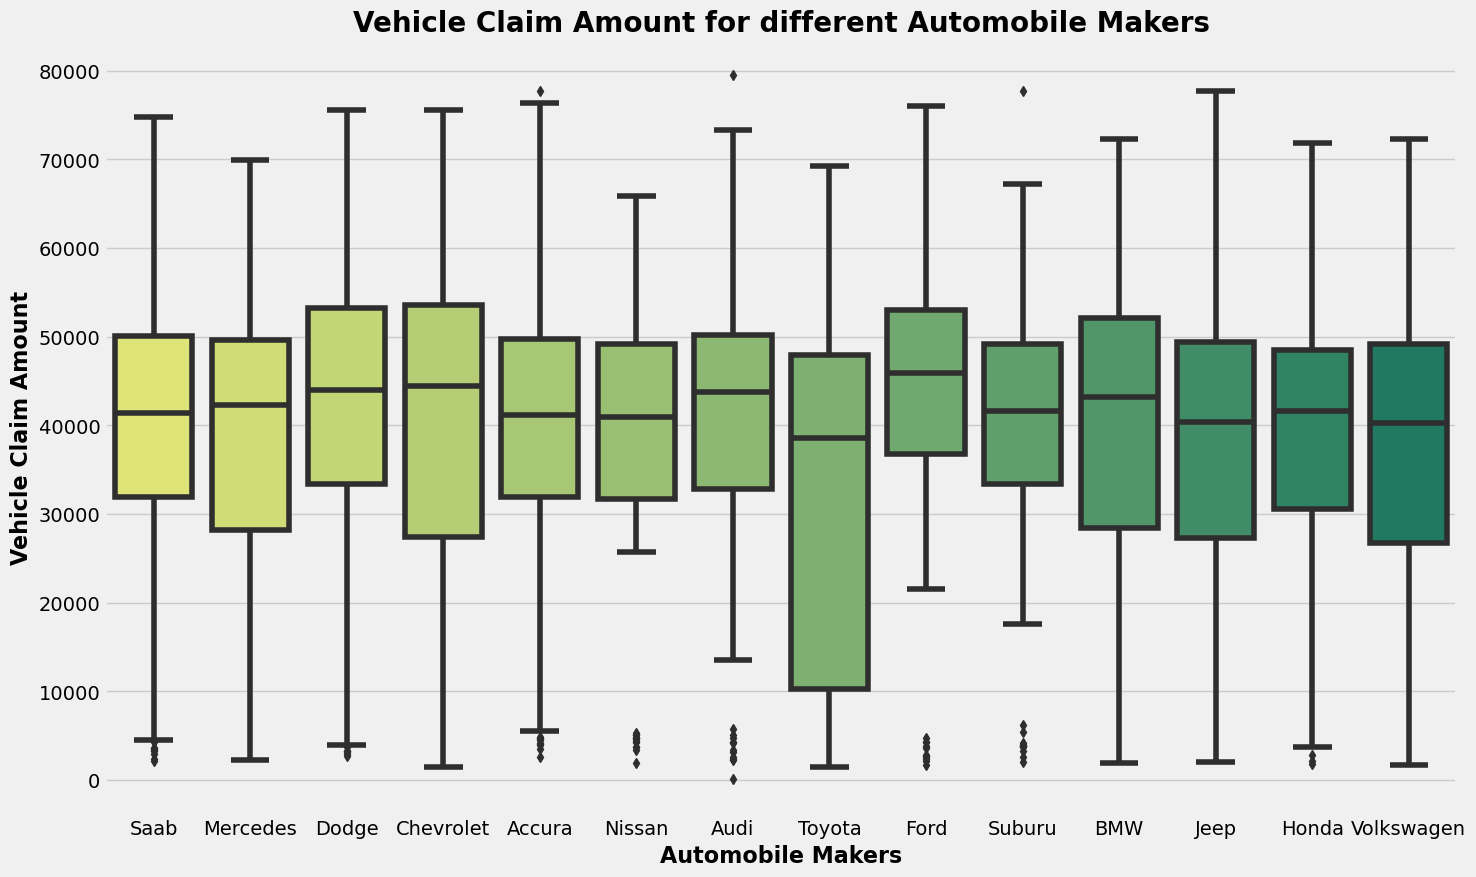

In [53]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df_ins['auto_make'], df_ins['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

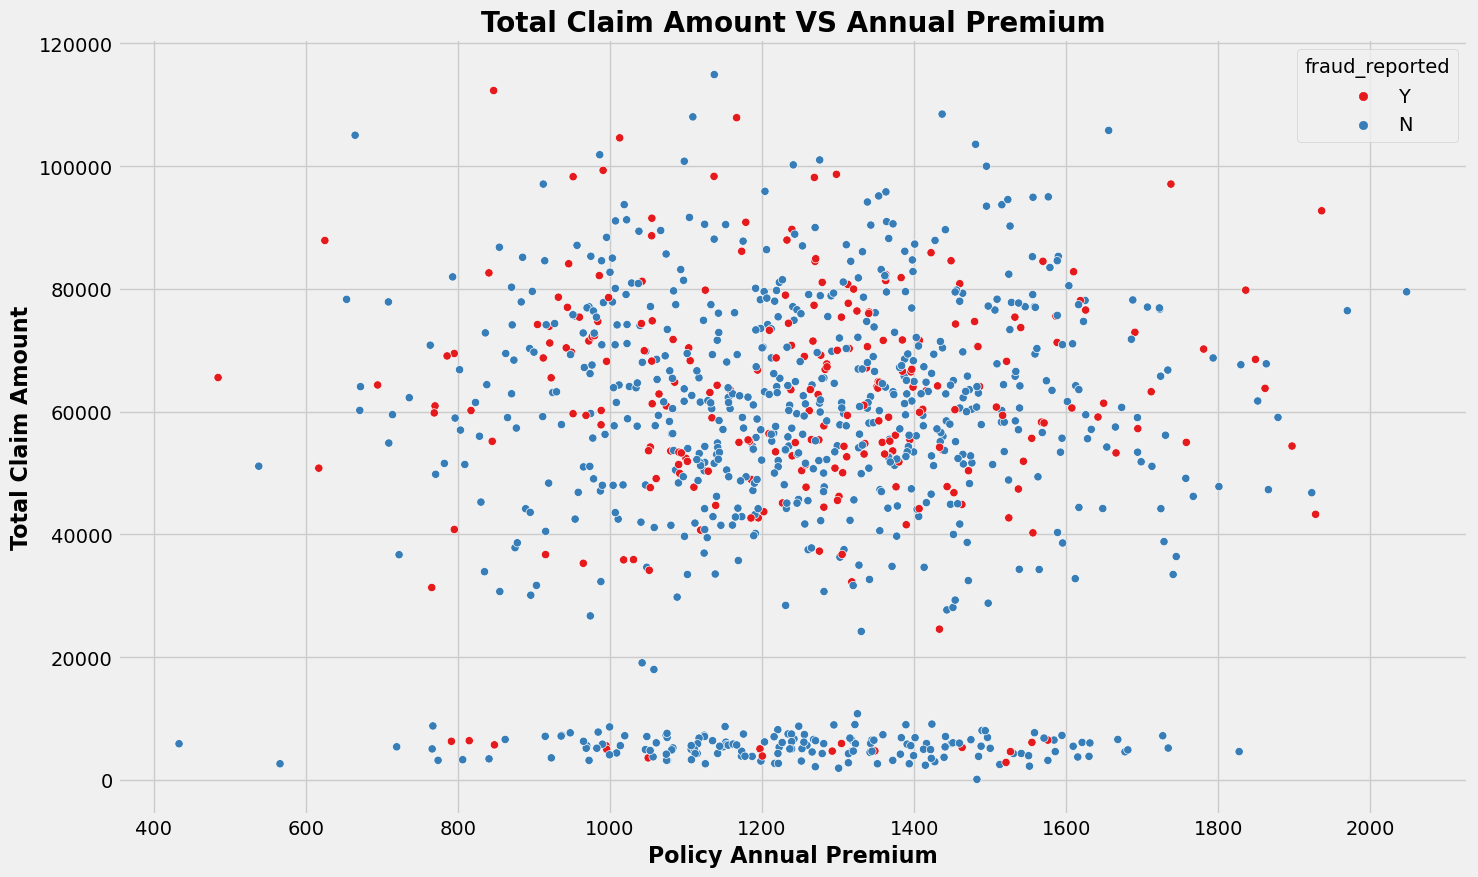

In [55]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df_ins['policy_annual_premium'], df_ins['total_claim_amount'], hue=df_ins.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

# Encoding categorical data

In [60]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported']

In [59]:
df_ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'],
      dtype='object')

In [88]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int64  
 11  insured_occupation           1000 non-null   int64  
 12  insured_hobbies              1000 non-null   int64  
 13  insured_relationshi

In [90]:
df_ins.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_csl', 'incident_location'], dtype='object')

In [91]:
# Using Label Encoder on categorical variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in Category:
    df_ins[i] = le.fit_transform(df_ins[i])
df_ins.head()

months_as_customer  age  policy_number  policy_state policy_csl  \
0                 328   48         521585             2    250/500   
1                 228   42         342868             1    250/500   
2                 134   29         687698             2    100/300   
3                 256   41         227811             0    250/500   
4                 228   44         367455             0   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  ...  vehicle_claim  auto_make  auto_model  fraud_reported  \
0            1  ...       0.753697         10           1               1   
1            1  ...      -1.786629          8          12               1   
2            0  ...      -0.820881          4          30               0   
3            0  ...       0.677602          3          34               1   
4            1  ...      -1.740038          0          31               0   

   policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
0               17                 10              2014            25   
1               27                  6              2006            21   
2                9                  6              2000            22   
3               25                  5              1990             1   
4                6                  6              2014            17   

   incident_month  Automobile_Age  
0               1              11  
1               1               8  
2               2               8  
3              10               1  
4               2               6  

[5 rows x 42 columns]

In [92]:
# identify variables with '?' values
unknowns = {}
for i in list(df_ins.columns):
    if (df_ins[i]).dtype == object:
        j = np.sum(df_ins[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                   0
policy_csl         0
incident_location  0


In [93]:
df_ins.collision_type.value_counts()

2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64

In [95]:
df_ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'],
      dtype='object')

In [97]:
df_new = df_ins.drop(columns = [
    'policy_number', 
    'insured_zip',   
    'incident_location',   
    'incident_hour_of_the_day',
    'policy_bind_year'])

df_new.head(5)

months_as_customer  age  policy_state policy_csl  policy_deductable  \
0                 328   48             2    250/500               1000   
1                 228   42             1    250/500               2000   
2                 134   29             2    100/300               2000   
3                 256   41             0    250/500               2000   
4                 228   44             0   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  ...  property_claim  \
0                        4                   2  ...           13020   
1                        4                   6  ...             780   
2                        6                  11  ...            3850   
3                        6                   1  ...            6340   
4                        0                  11  ...             650   

   vehicle_claim  auto_make  auto_model  fraud_reported  policy_bind_day  \
0       0.753697         10           1               1               17   
1      -1.786629          8          12               1               27   
2      -0.820881          4          30               0                9   
3       0.677602          3          34               1               25   
4      -1.740038          0          31               0                6   

   policy_bind_month  incident_day  incident_month  Automobile_Age  
0                 10            25               1              11  
1                  6            21               1               8  
2                  6            22               2               8  
3                  5             1              10               1  
4                  6            17               2               6  

[5 rows x 37 columns]

# Feature selection and Engineering

Outliers Detection and Removal
---------------------

In [98]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age']

In [99]:
len(Numerical)

20

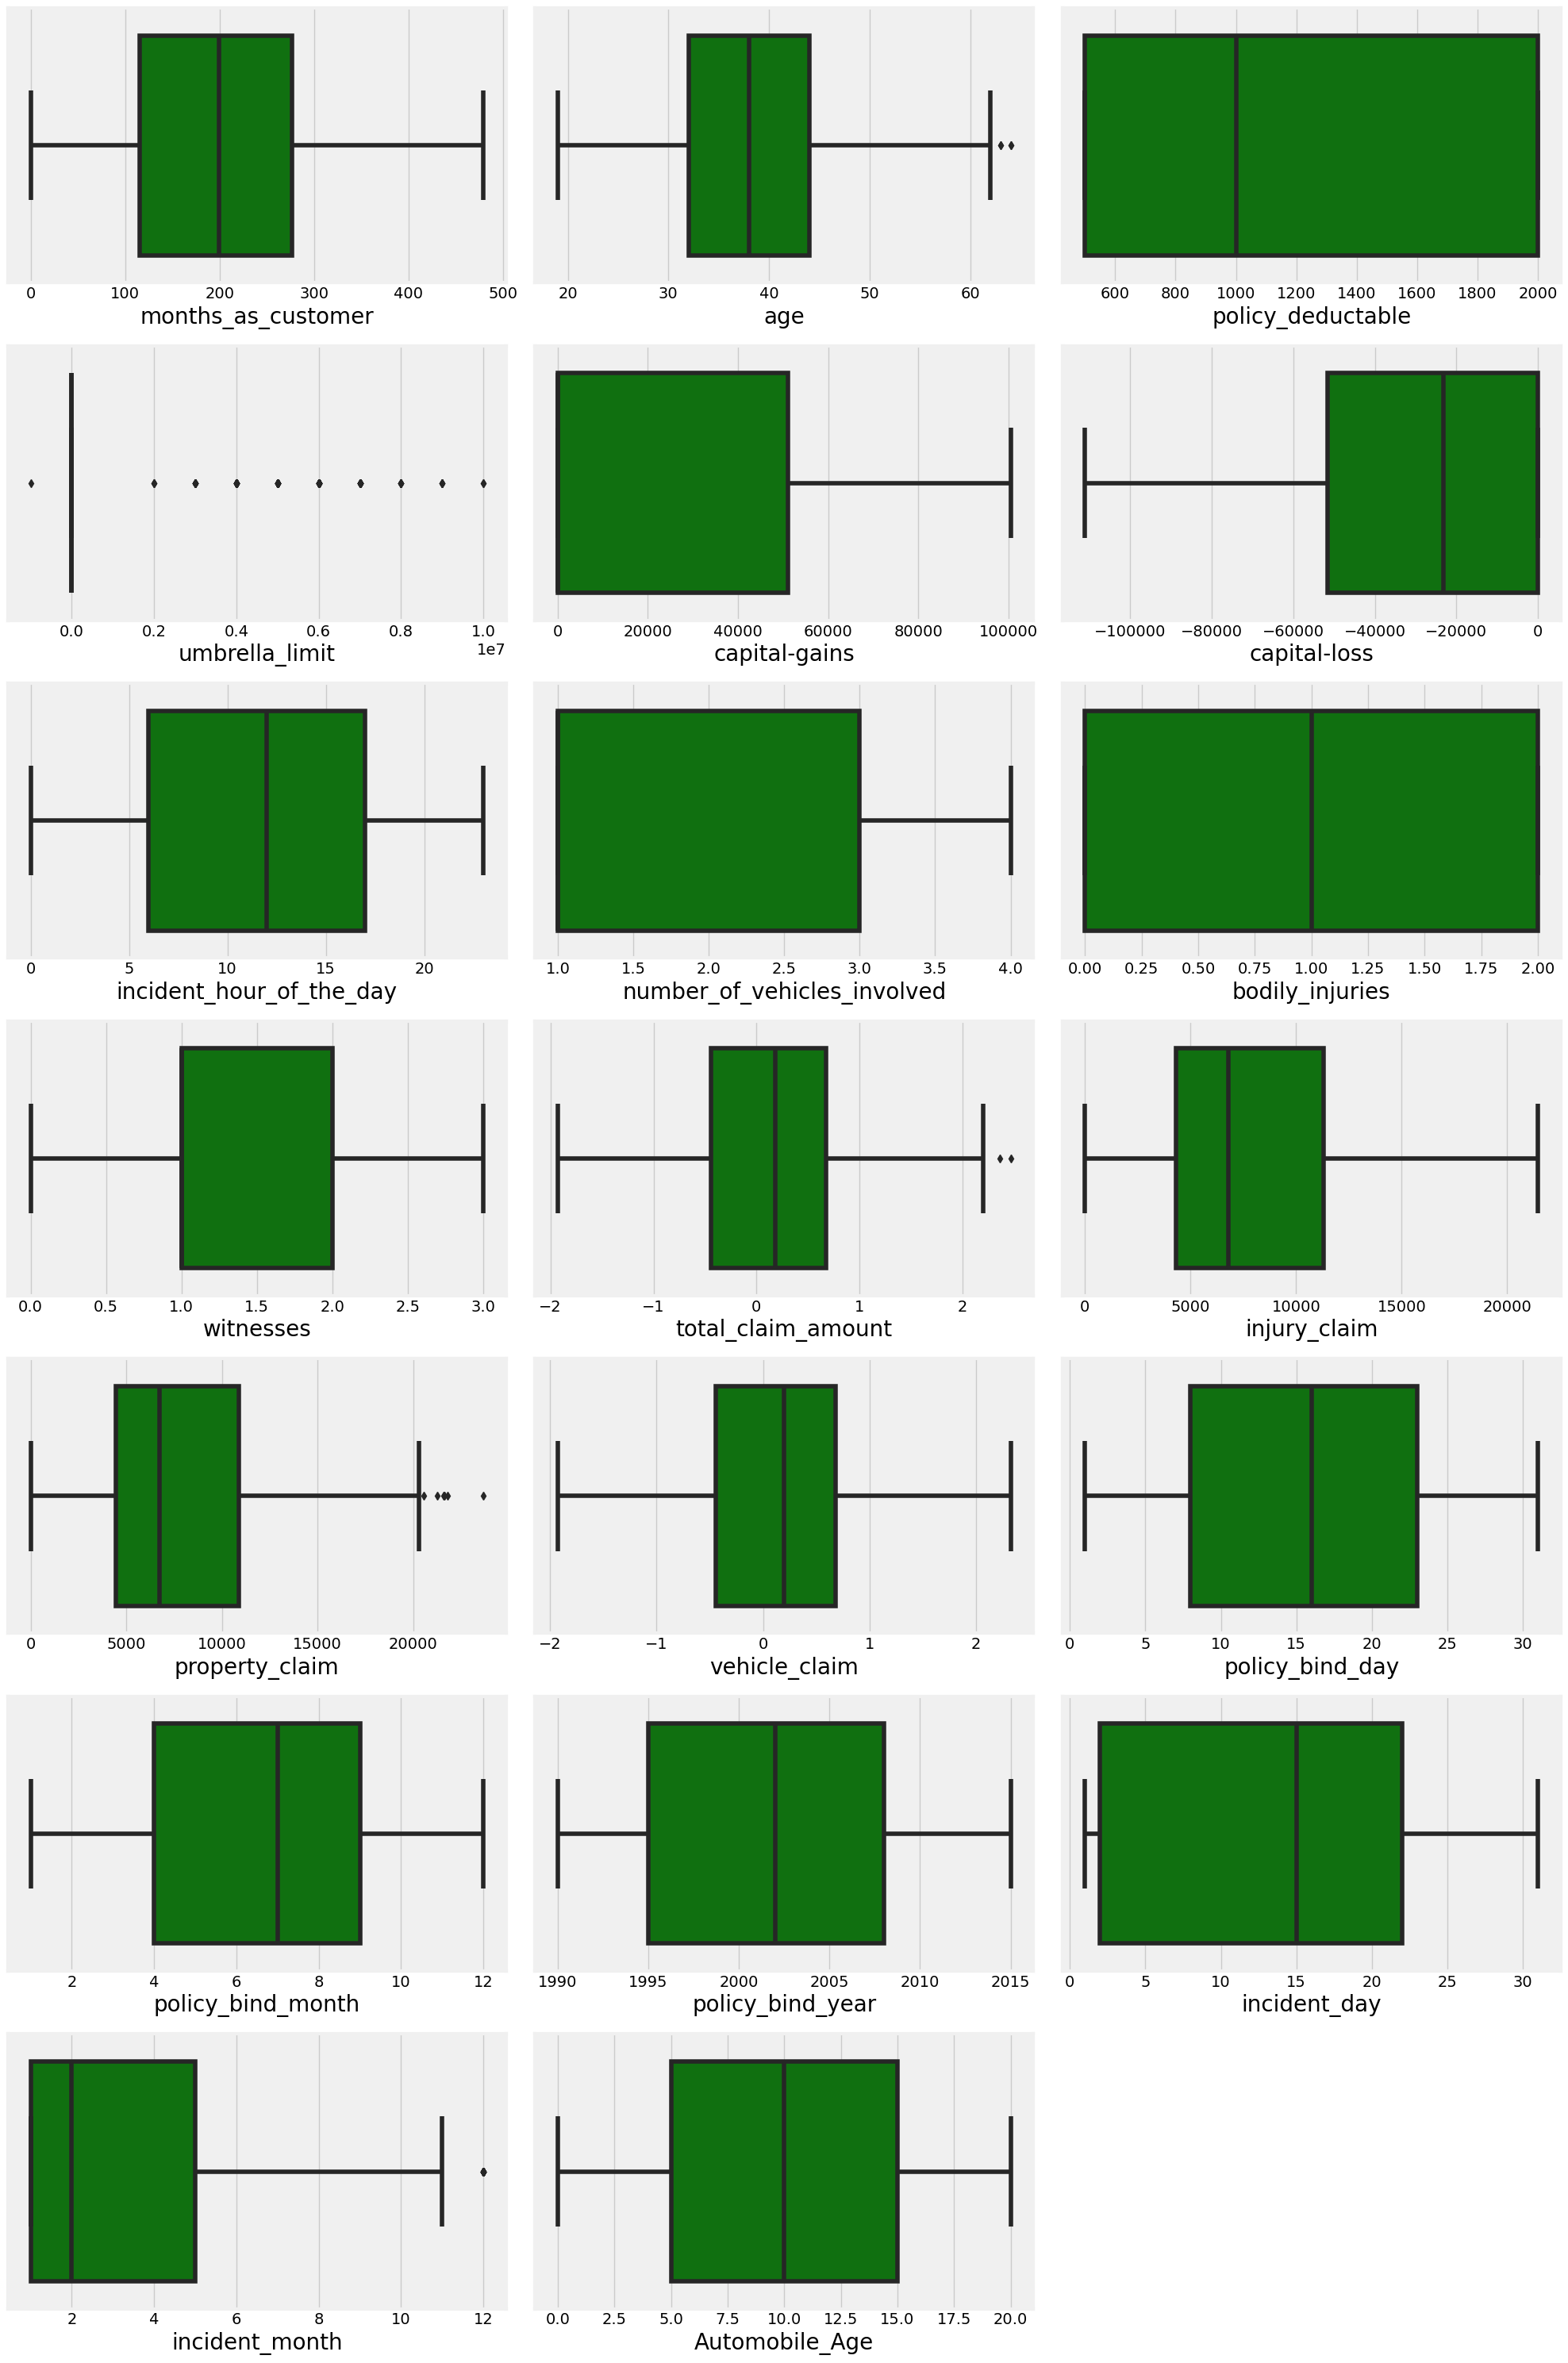

In [100]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df_ins[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From Boxplot we can see outliers exist dataset.

Skewness of features
-----------------

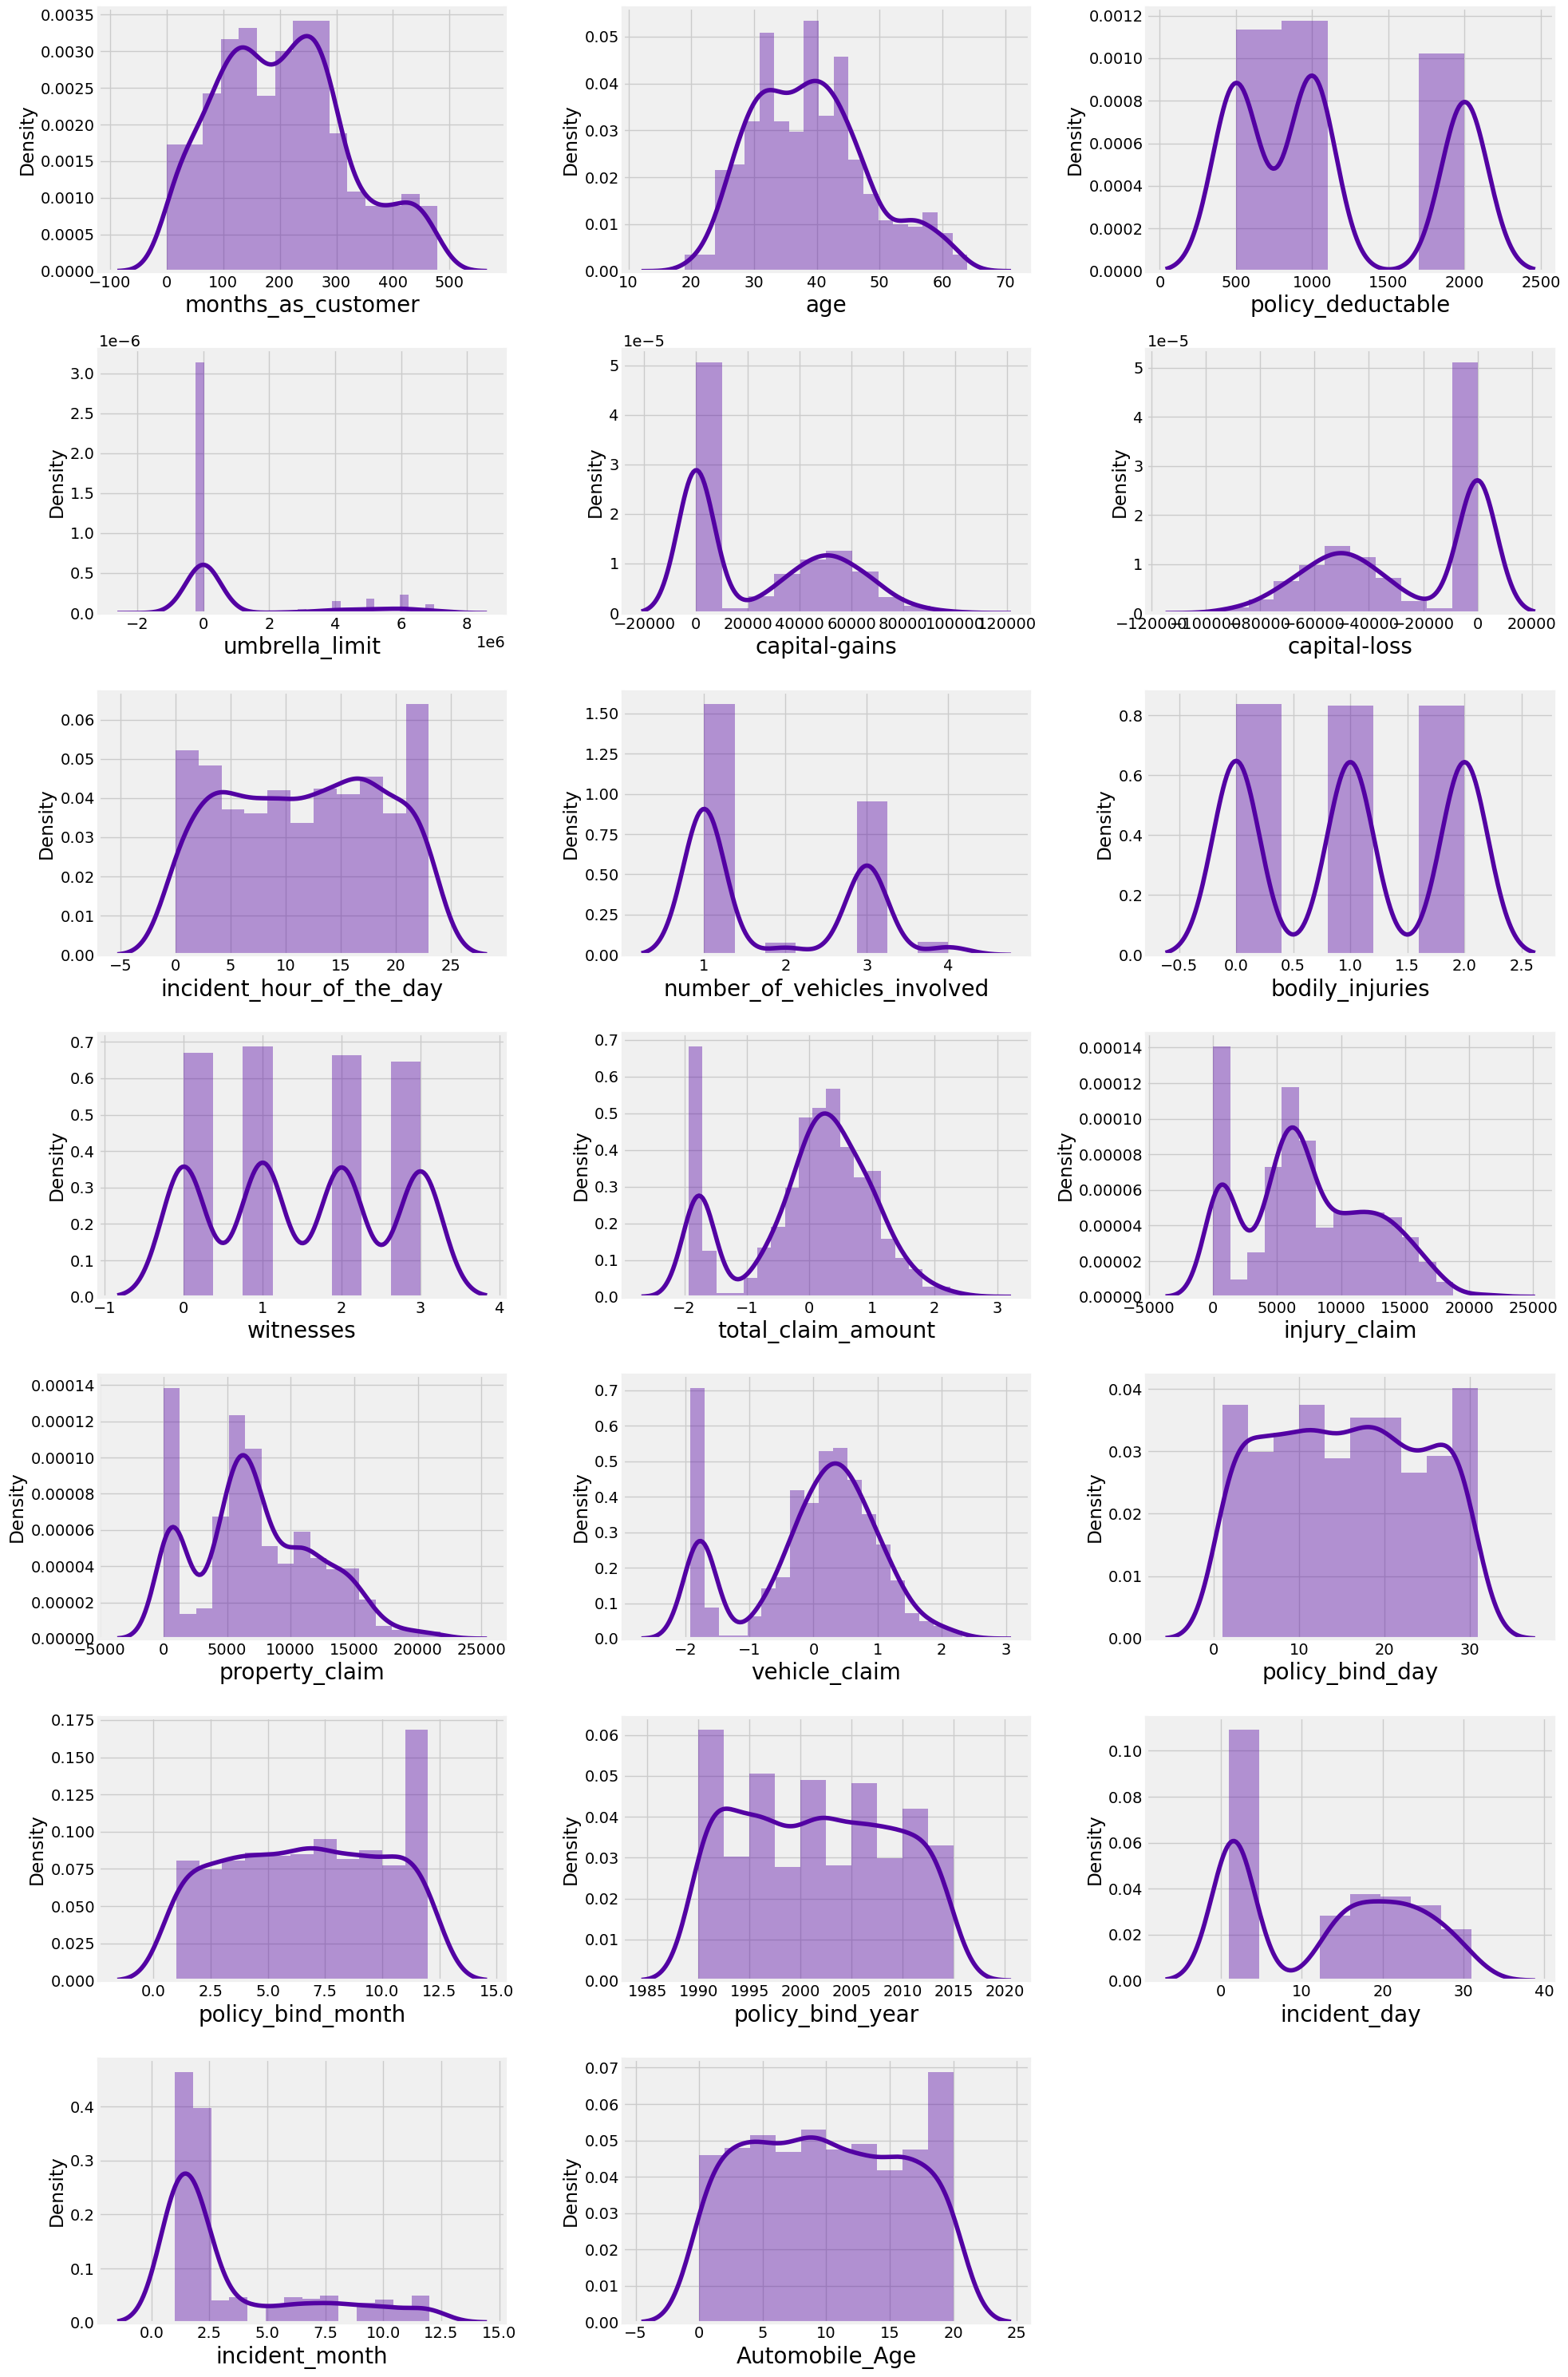

In [106]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df_ins[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature So we going to ignore skewness present in discrete numerical and categorical feature.

We also going to ignore sknewness in target feature.

In [70]:
df_ins[Numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
Automobile_Age                 0.048289
dtype: float64

Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

We will use yeo-johnson method to transform negatively skewed data.

In [71]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method

skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df_ins[skew] = scaler.fit_transform(df_ins[skew].values)

In [72]:
df_ins[skew].skew() # chk for skewness after transformation

total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced

Corrleation
--------

In [73]:
df_ins.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.017824 -0.018672      -0.013402   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.007040 -0.001486       0.005575   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available                0.017647  0.014661       0.032019   
total_claim_amount                     0.062495  0.070386      -0.018536   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061308  0.062764      -0.020981   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
fraud_reported                         0.020544  0.012143      -0.029443   
policy_bind_day                        0.051728  0.053869       0.041885   
policy_bind_month                      0.005750  0.015501       0.005509   
policy_bind_year                      -0.048276 -0.037444      -0.040099   
incident_day                          -0.011092 -0.006131       0.057199   
incident_month                         0.024659  0.023404      -0.042512   
Automobile_Age                         0.000292 -0.001354       0.000183   

                             policy_state  policy_deductable  \
months_as_customer              -0.000328           0.026807   
age                             -0.014533           0.029188   
policy_number                    0.072815          -0.006738   
policy_state                     1.000000           0.010033   
policy_deductable                0.010033           1.000000   
policy_annual_premium            0.012455          -0.003245   
umbrella_limit                  -0.029580           0.010870   
insured_zip                      0.008777           0.004545   
insured_sex                     -0.020481          -0.009733   
insured_education_level         -0.034327           0.015217   
insured_occupation              -0.031215          -0.046733   
insured_hobbies                 -0.038689           0.004061   
insured_relationship            -0.018506          -0.022945   
capital-gains   

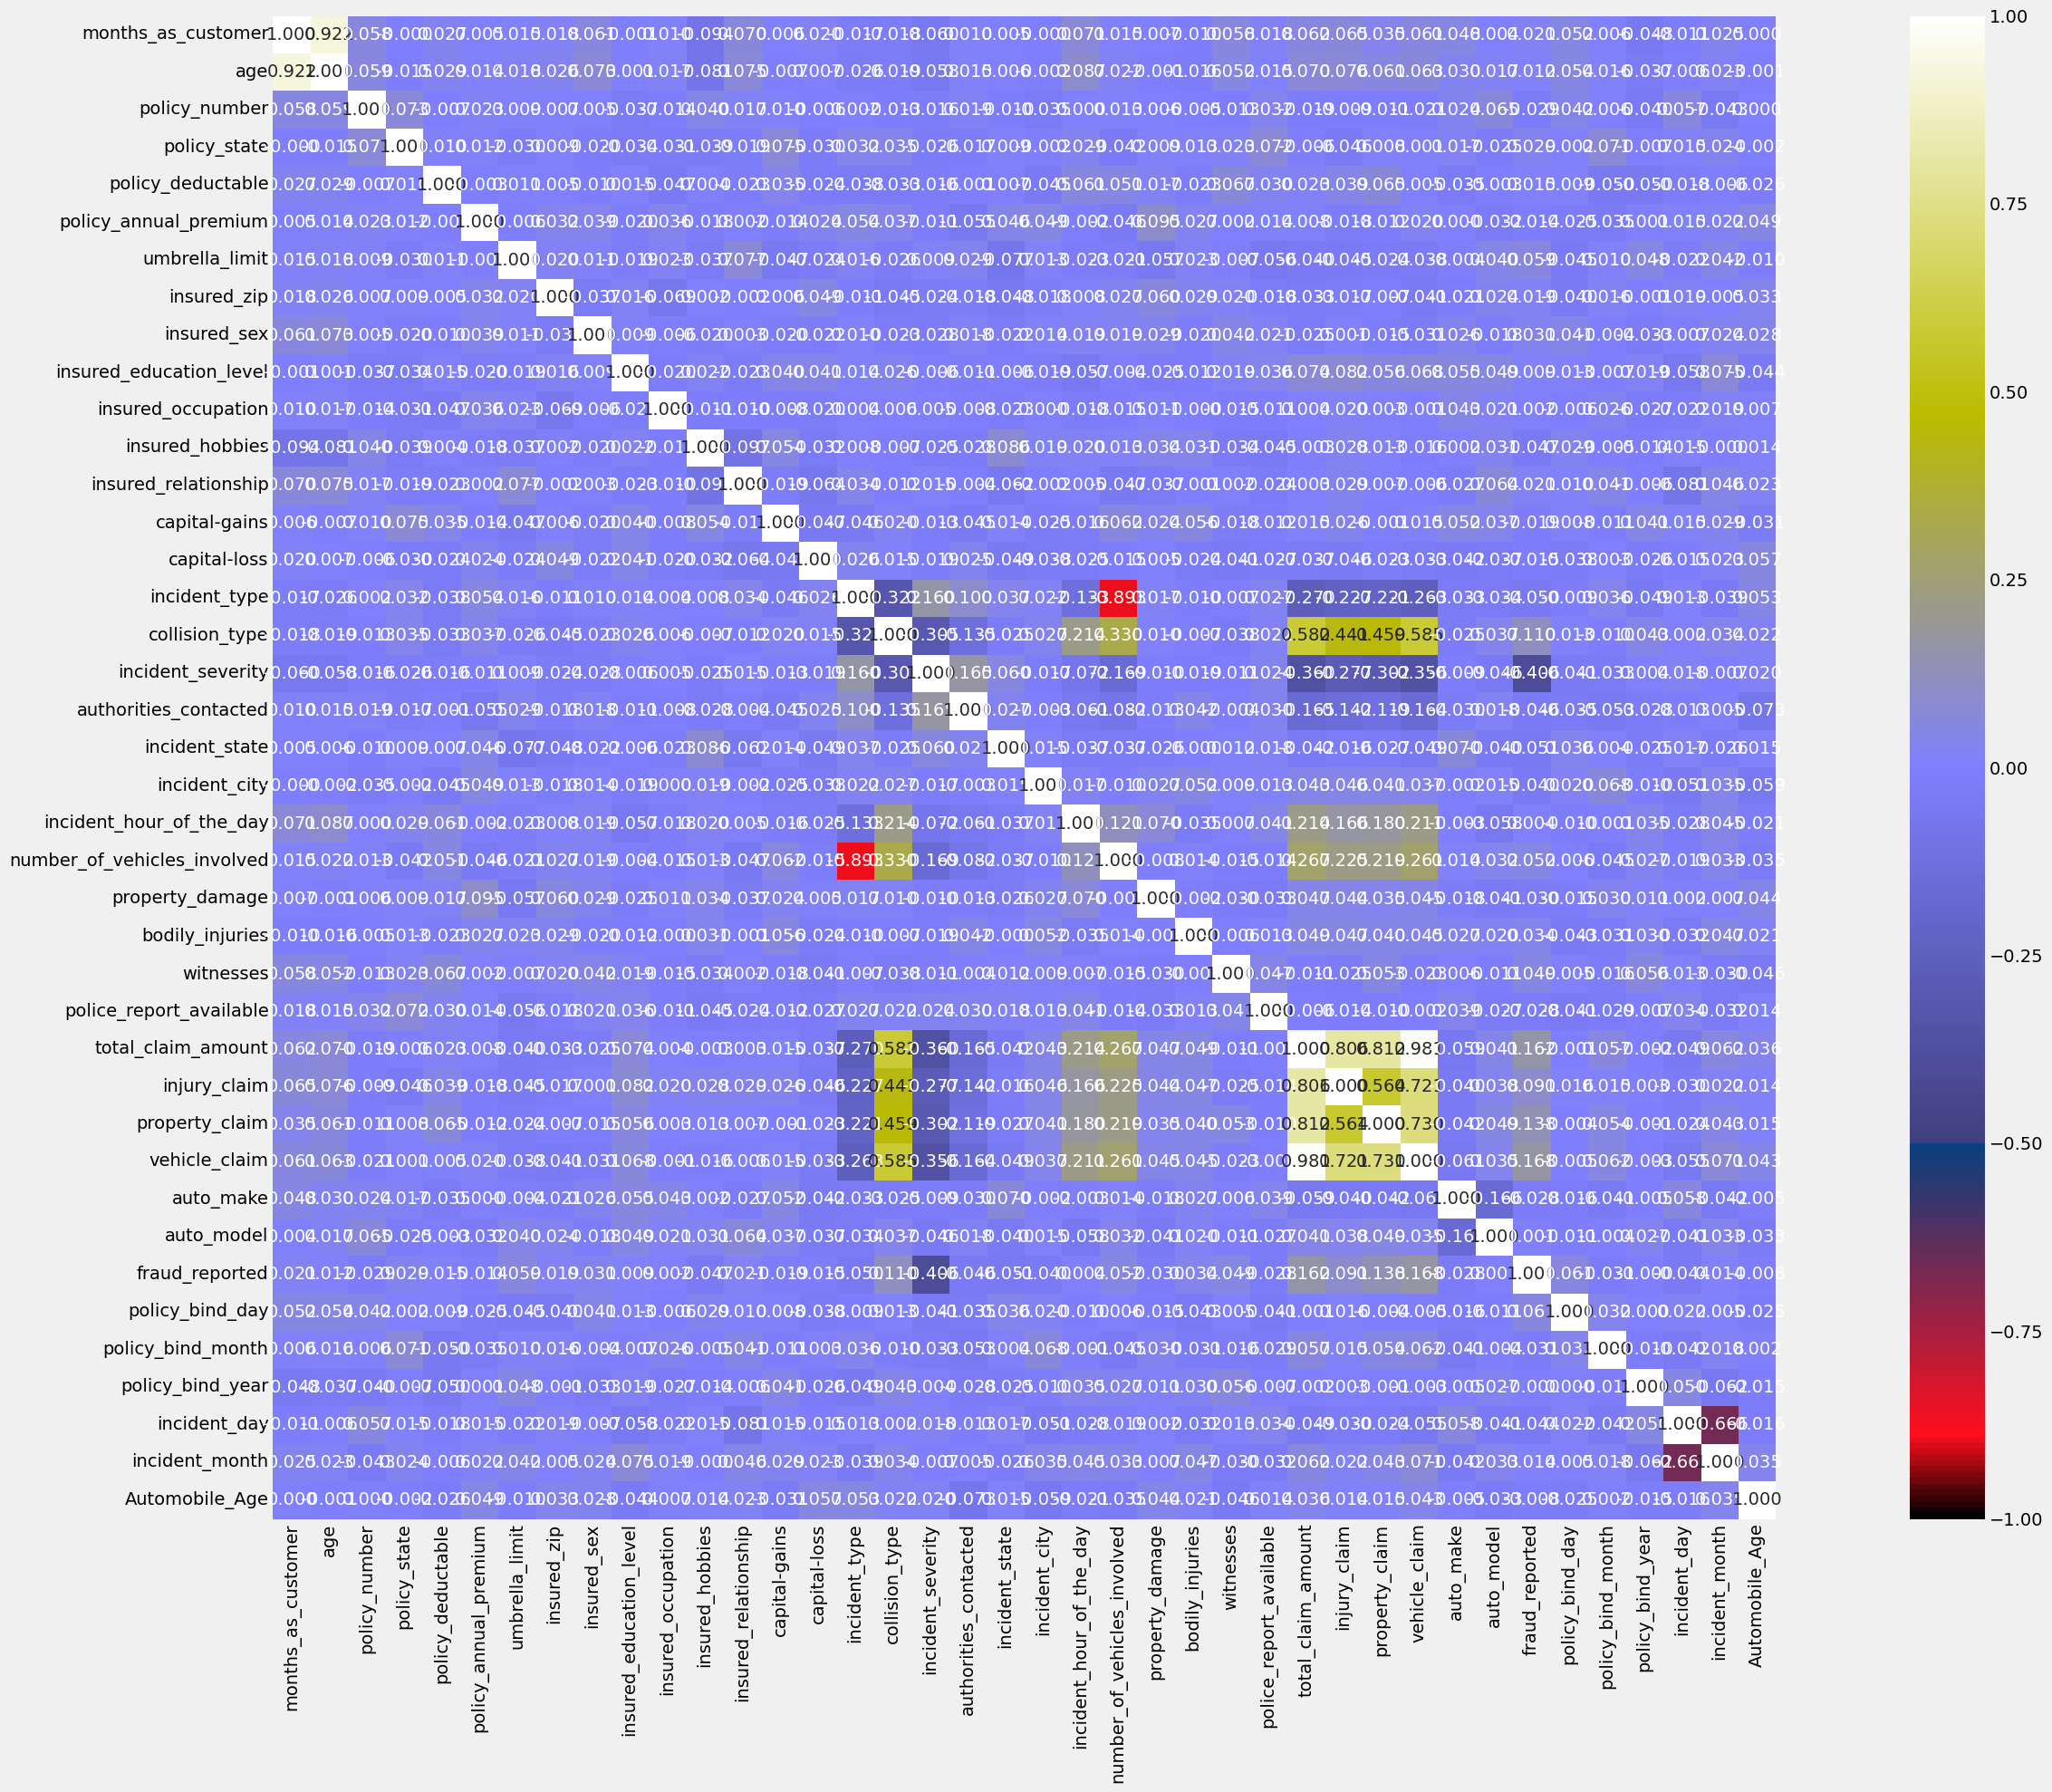

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(df_ins.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

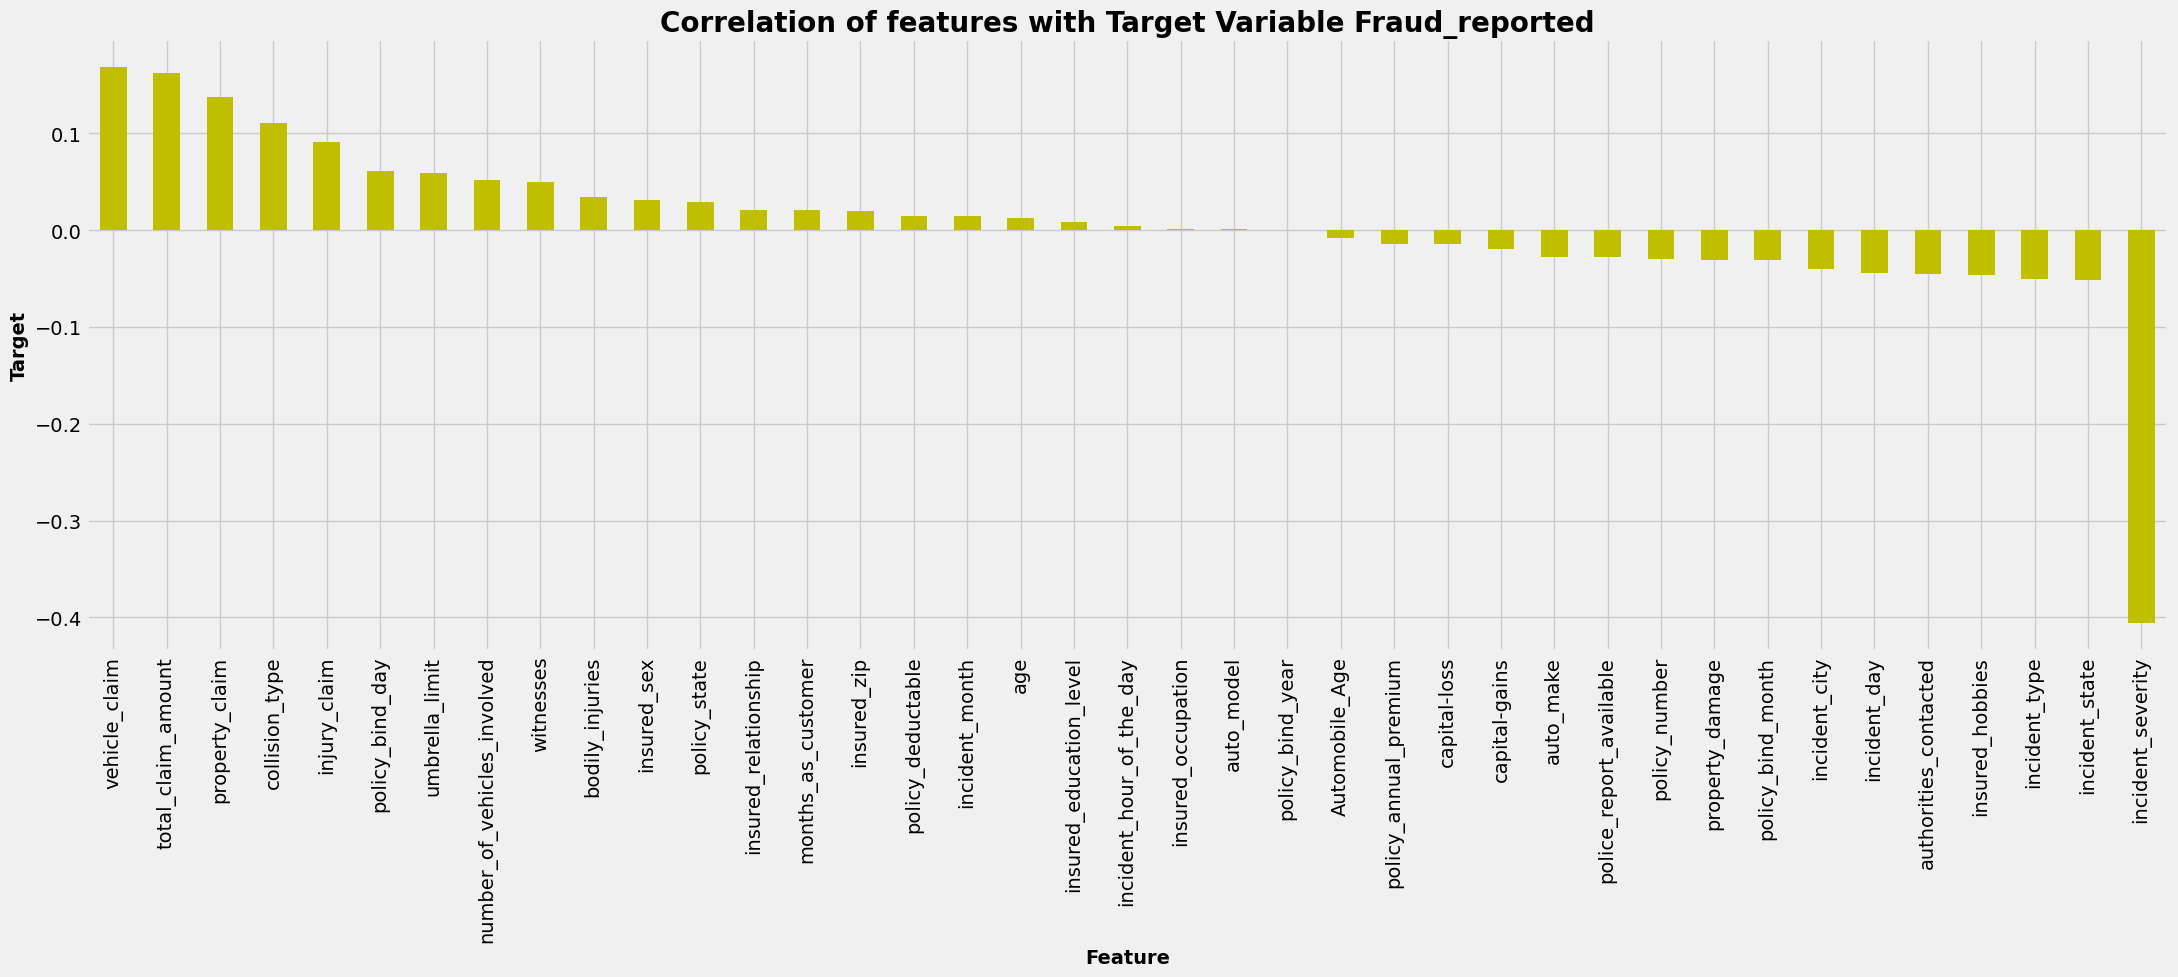

In [75]:
plt.figure(figsize=(22,10))
df_ins.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

Incident_severity is correlated with target variable with correlation of 0.4. 

Other variable are poorly correlated with target variable.

injury_claim,property_claim,vehicle_claim are highly correlated with each other.

incident_hour_of_the_day is highly negative correlated with incident type.

Balanceing Imbalanced target feature
---------

In [107]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df_ins.head()

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                 328   48         521585             2               1000   
1                 228   42         342868             1               2000   
2                 134   29         687698             2               2000   
3                 256   41         227811             0               2000   
4                 228   44         367455             0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               3                  0                      4               4   
1               0                  1                      4               5   
2               2                  1                      4               1   
3               1                  0                      4               2   
4               0                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                2                1          2                        2   
1                0                0          0                        0   
2                1                2          3                        1   
3                0                1          2                        1   
4                1                0          1                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.715714          6510           13020       0.753697         10   
1           -1.776979           780             780      -1.786629          8   
2           -0.716825          7700            3850      -0.820881          4   
3            0.391426          6340            6340       0.677602          3   
4           -1.729802          1300             650      -1.740038          0   

   auto_model  fraud_reported  policy_bind_day  policy_bind_month  \
0           1               1               17                 10   
1          12               1               27                  6   
2          30               0                9                  6   
3          34               1               25                  5   
4          31               0                6                  6   

   p

In [103]:
df_ins= df_ins.drop(columns = [
    'policy_csl', 
    'incident_location'])

df_ins.head(2)

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                 328   48         521585             2               1000   
1                 228   42         342868             1               2000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               3                  0                      4               4   
1               0                  1                      4               5   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                2                1          2                        2   
1                0                0          0                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.715714          6510           13020       0.753697         10   
1           -1.776979           780             780      -1.786629          8   

   auto_model  fraud_reported  policy_bind_day  policy_bind_month  \
0           1               1               17                 10   
1          12               1               27                  6   

   policy_bind_year  incident_day  incident_month  Automobile_Age  
0              2014            25               1              11  
1              2006            21               1               8

In [109]:
df_ins.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

Balancing using SMOTE
------------

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
# Splitting data in target and dependent feature
X = df_ins.drop(['fraud_reported'], axis =1)
Y = df_ins['fraud_reported']

In [112]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [113]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

Standard Scaling
--------

In [115]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Outliers removal using Zscore method
------------------

In [105]:
from scipy.stats import zscore
z = np.abs(zscore(df_ins))
threshold = 3
df1 = df_ins[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_ins.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_ins.shape[0]-df1.shape[0])/df_ins.shape[0]*100)

df_ins=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


 Checking Multicollinearity between features using variance_inflation_factor
 ---------------

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif


VIF values                     Features
0       7.359342           months_as_customer
1       7.354023                          age
2       1.048990                policy_number
3       1.079212                 policy_state
4       1.067736            policy_deductable
5       1.054939        policy_annual_premium
6       1.067991               umbrella_limit
7       1.069281                  insured_zip
8       1.071535                  insured_sex
9       1.057140      insured_education_level
10      1.054834           insured_occupation
11      1.065963              insured_hobbies
12      1.059621         insured_relationship
13      1.053405                capital-gains
14      1.067477                 capital-loss
15      3.754873                incident_type
16      1.836716               collision_type
17      1.350517            incident_severity
18      1.115777        authorities_contacted
19      1.079930               incident_state
20      1.076469                incident_city
21      1.129112     incident_hour_of_the_day
22      3.667087  number_of_vehicles_involved
23      1.073909              property_damage
24      1.053573              bodily_injuries
25      1.058555                    witnesses
26      1.091391      police_report_available
27  49654.952730           total_claim_amount
28   1892.315726                 injury_claim
29   1891.671448               property_claim
30  24753.225858                vehicle_claim
31      1.084267                    auto_make
32      1.083741                   auto_model
33      1.030092              policy_bind_day
34      1.062142            policy_bind_month
35      1.047359             policy_bind_year
36      1.849795                 incident_day
37      1.845396               incident_month
38      1.059192               Automobile_Age

Strategy to Address Multicollinearity :
    
Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.

We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

PCA
---

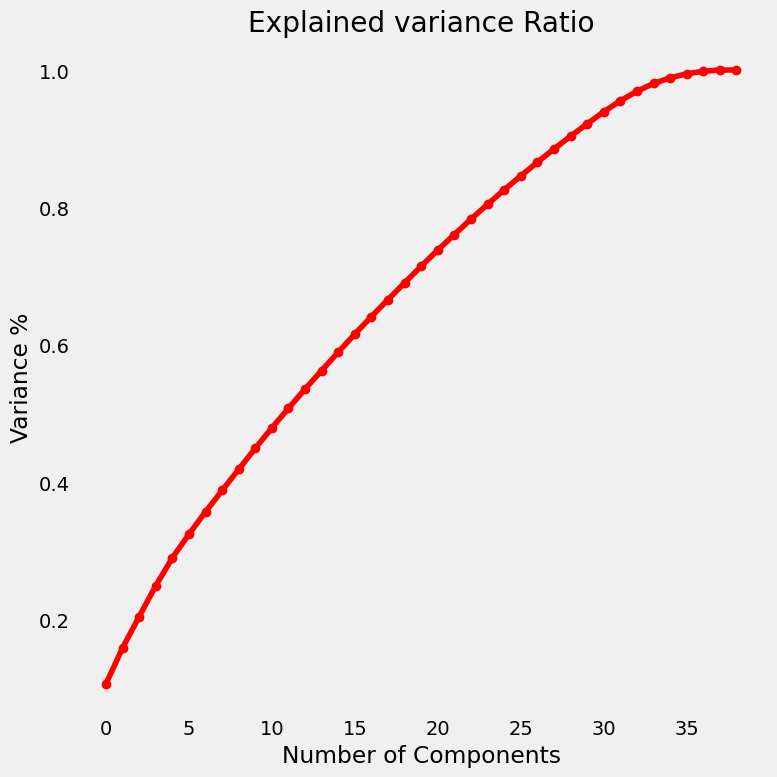

In [118]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [121]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [122]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))


# Machine Learning Model Building

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


Finding best Random state
---------

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8108108108108109 on Random_state 187


# Logistic Regression

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8018018018018018


Confusion matrix of Logistics Regression : 
 [[177  50]
 [ 38 179]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       227
           1       0.78      0.82      0.80       217

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



# Applying other classification algorithm

In [128]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8018018018018018


Confusion matrix : 
 [[177  50]
 [ 38 179]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       227
           1       0.78      0.82      0.80       217

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8400900900900901


Confusion matrix : 
 [[195  32]
 [ 39 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       227
           1       0.85      0.82      0.83       217

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84     

CrossValidation 
-----

In [129]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.62162162 0.71283784 0.80743243 0.81418919 0.83783784]
Mean Score : 0.7587837837837837
Std deviation : 0.08075949740275178




Cross Validation Score SVC() :

Score : [0.58783784 0.75675676 0.88175676 0.89527027 0.92567568]
Mean Score : 0.8094594594594595
Std deviation : 0.12489221064780907




Cross Validation Score GaussianNB() :

Score : [0.63513514 0.72297297 0.84459459 0.84121622 0.84797297]
Mean Score : 0.7783783783783784
Std deviation : 0.08574960575290522




Cross Validation Score DecisionTreeClassifier() :

Score : [0.57432432 0.65540541 0.73986486 0.76689189 0.75      ]
Mean Score : 0.6972972972972974
Std deviation : 0.07254000684542065




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.66554054 0.71283784 0.71283784 0.76689189 0.78378378]
Mean Score : 0.7283783783783784
Std deviation : 0.0423902355171841




Cross Validation Score RandomForestClassifier() :

Score : [0.60472973 0.73986486 0

The Extra TreesClassifier gives the Highest accuracy score of 0.858.so we this model decently fits in.
Also we are going to perform hyperparametr tuning on this model.


Hyper Parameter Tuning : GridSearchCV
---------------

In [130]:
from sklearn.model_selection import GridSearchCV

parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [131]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.803 total time=   0.1s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.783 total time=   0.1s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.778 total time=   0.1s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [132]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 300}

Final Model
-------

In [133]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8693693693693694


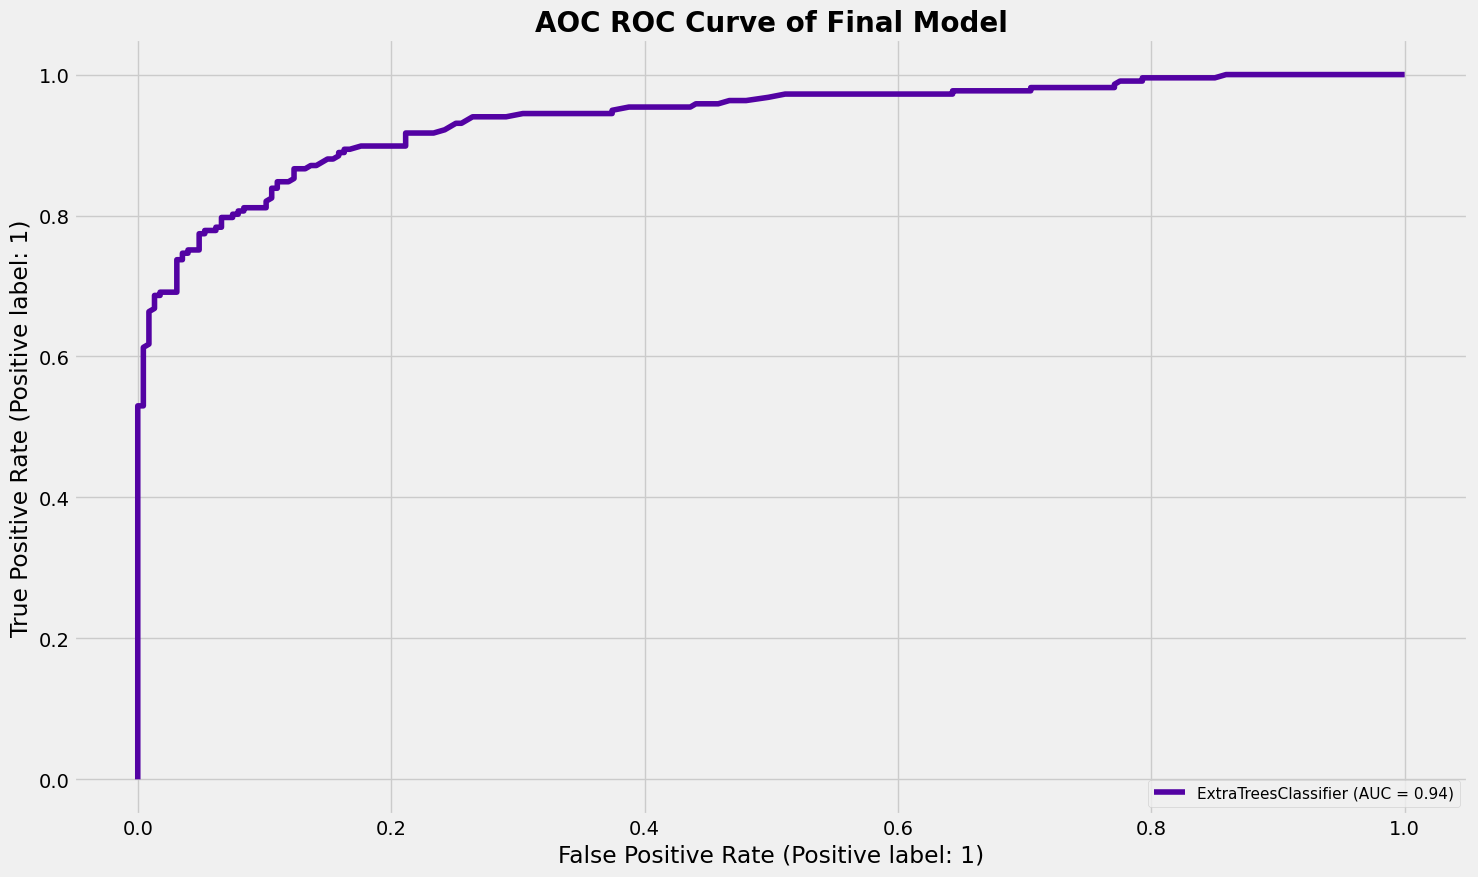

Auc Score :
 0.8692015672262937


In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

Saving model
----------

In [136]:
import joblib
joblib.dump(Final_mod,'Insurance_claimsFinal.pkl')

['Insurance_claimsFinal.pkl']

Predicting the Final Model
-----------

In [137]:
# Prediction
prediction = Final_mod.predict(X_test)

In [138]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0                 1              1
1                 0              0
2                 0              0
3                 0              1
4                 1              1